# Question 1
## What is the difference between AI, ML, DL, and Data Science? Provide a brief explanation of each. (Hint: Compare their scope, techniques, and applications for each.)

**Answer:**

**Artificial Intelligence (AI):** The broadest field. AI builds systems capable of human-like tasks such as reasoning, planning, perception, and decision-making. AI may use symbolic logic, rule-based systems, or data-driven learning.
- *Scope:* Most general; includes ML, DL.
- *Techniques:* Search algorithms, expert systems, robotics, NLP.
- *Applications:* Chatbots, autopilots, recommendation engines.

**Machine Learning (ML):** A subset of AI focused on learning from data and improving predictions without explicit programming. ML uses statistical techniques to model and generalize from data.
- *Scope:* Data-driven learning.
- *Techniques:* Regression, classification, clustering, supervised/unsupervised/reinforcement learning.
- *Applications:* Spam filtering, virtual assistants, predictive analytics.

**Deep Learning (DL):** A subset of ML that uses neural networks with many layers (“deep”) to learn representation from large datasets.
- *Scope:* Narrowest, focuses on neural networks.
- *Techniques:* CNNs, RNNs, autoencoders.
- *Applications:* Image recognition, speech processing, self-driving cars.

**Data Science:** Not a subset of AI; it uses statistics, ML, and domain knowledge to extract insights from data.
- *Scope:* Full data pipeline (collection, cleaning, modeling, visualization).
- *Techniques:* Statistical analysis, ML/DL, big data technologies, visualization.
- *Applications:* Business intelligence, scientific analytics, market prediction.





# Question 2
## Explain overfitting and underfitting in ML. How can you detect and prevent them? Hint: Discuss bias-variance tradeoff, cross-validation, and regularization techniques.

**Answer:**

- **Overfitting:** A model learns not only the underlying pattern but also the noise in training data, failing to generalize well to new/unseen data.
- **Underfitting:** The model is too simple to learn the underlying data pattern; poor results on both training and test data.
- **Detection:** Visibly higher training accuracy than testing accuracy indicates overfitting; both low means underfitting.
- **Prevention:** Use cross-validation, regularization (like L1/L2), and simpler models to prevent overfitting. Increase model complexity for underfitting. The bias-variance tradeoff: balance error due to bias (underfitting) and error due to variance (overfitting).



# Question 3
## How would you handle missing values in a dataset? Explain at least three methods with examples. Hint: Consider deletion, mean/median imputation, and predictive modeling.

**Answer:**


- **Deletion:** Remove rows or columns with missing values. Suitable only if data loss is minimal.
  - *Example:* `df.dropna()`
 
    


In [1]:

import pandas as pd
import numpy as np

# Create a sample DataFrame with missing values
data = {'A': [1, 2, np.nan, 4, 5],
        'B': [6, np.nan, 8, 9, 10],
        'C': ['X', 'Y', 'X', np.nan, 'Y']}
df = pd.DataFrame(data)
print("Original DataFrame:")
display(df)

# Drop rows with any missing values
df_dropped_rows = df.dropna()
print("\nDataFrame after dropping rows with missing values:")
display(df_dropped_rows)


Original DataFrame:


,A,B,C
0,1.0,6.0,X
1,2.0,NaN,Y
2,NaN,8.0,X
3,4.0,9.0,NaN
4,5.0,10.0,Y



DataFrame after dropping rows with missing values:


,A,B,C
0,1.0,6.0,X
4,5.0,10.0,Y


- **Mean/Median Imputation:** Replace missing numerical values with mean or median.Mean/median imputation works best for numerical data with missing completely at random (MCAR) values and should be chosen according to whether the column is normally distributed (mean) or skewed (median). Categorical values can be filled with mode.

  - *Example:* `df['x'].fillna(df['x'].mean())`
  -  *Example:* `df['x'].fillna(df['x'].median())`


In [2]:

import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer # Explicitly enable the experimental feature
from sklearn.impute import IterativeImputer

# Create a sample DataFrame with missing values
data = {'A': [1, 2, np.nan, 4, 5],
        'B': [6, np.nan, 8, 9, 10],
        'C': [11, 12, 13, np.nan, 15]}
df = pd.DataFrame(data)
print("Original DataFrame:")
display(df)

# Predictive Modeling Imputation using IterativeImputer (uses a regression model by default)
imputer_predictive = IterativeImputer(max_iter=10, random_state=0)
df_imputed = pd.DataFrame(imputer_predictive.fit_transform(df), columns=df.columns)
print("\nDataFrame after Predictive Modeling Imputation:")
display(df_imputed)
     

Original DataFrame:


,A,B,C
0,1.0,6.0,11.0
1,2.0,NaN,12.0
2,NaN,8.0,13.0
3,4.0,9.0,NaN
4,5.0,10.0,15.0



DataFrame after Predictive Modeling Imputation:


,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,3.0,8.0,13.0
3,4.0,9.0,14.0
4,5.0,10.0,15.0



- **Predictive Modeling:** Use regression or supervised models to predict missing values based on other features.
  - *Example:* Use linear regression to estimate missing incomes.
Each method should be chosen based on dataset characteristics and impact of missingness.


In [3]:

import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer # Explicitly enable the experimental feature
from sklearn.impute import IterativeImputer

# Create a sample DataFrame with missing values
data = {'A': [1, 2, np.nan, 4, 5],
        'B': [6, np.nan, 8, 9, 10],
        'C': [11, 12, 13, np.nan, 15]}
df = pd.DataFrame(data)
print("Original DataFrame:")
display(df)

# Predictive Modeling Imputation using IterativeImputer (uses a regression model by default)
imputer_predictive = IterativeImputer(max_iter=10, random_state=0)
df_imputed = pd.DataFrame(imputer_predictive.fit_transform(df), columns=df.columns)
print("\nDataFrame after Predictive Modeling Imputation:")
display(df_imputed)

Original DataFrame:


,A,B,C
0,1.0,6.0,11.0
1,2.0,NaN,12.0
2,NaN,8.0,13.0
3,4.0,9.0,NaN
4,5.0,10.0,15.0



DataFrame after Predictive Modeling Imputation:


,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,3.0,8.0,13.0
3,4.0,9.0,14.0
4,5.0,10.0,15.0


# Question 4
## What is an imbalanced dataset? Describe two techniques to handle it (theoretical + practical). Hint: Discuss SMOTE, Random Under/Oversampling, and class weights in models.




**Answer:**
#### Handling Imbalanced Datasets

An imbalanced dataset is one where the classes are not represented equally, meaning one class (majority class) has significantly more samples than the other class (minority class). This imbalance often leads to poor predictive performance on the minority class since most machine learning models are biased toward the majority class.

## 1. SMOTE (Synthetic Minority Oversampling Technique)
- **Theoretical:** SMOTE generates synthetic minority class samples by interpolating between existing minority examples and their nearest neighbors in the feature space. This creates new, plausible samples rather than duplicating existing ones, thereby improving the model's ability to learn decision boundaries.

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Create imbalanced dataset
X, y = make_classification(n_classes=2, weights=[0.1, 0.9], n_samples=1000, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_res))

Before SMOTE: Counter({np.int64(1): 714, np.int64(0): 86})
After SMOTE: Counter({np.int64(1): 714, np.int64(0): 714})


## 2. Random Undersampling & Oversampling
- **Theoretical:** Random oversampling duplicates minority class samples to balance classes, while random undersampling reduces the number of majority class samples. Both methods influence the class distribution but may risk overfitting (oversampling) or loss of information (undersampling).

In [5]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Random oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

print("After random oversampling:", Counter(y_ros))

# Random undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

print("After random undersampling:", Counter(y_rus))

After random oversampling: Counter({np.int64(1): 714, np.int64(0): 714})
After random undersampling: Counter({np.int64(0): 86, np.int64(1): 86})


## 3. Using Class Weights in Models
- **Theoretical:** Instead of modifying data distribution, weights are assigned to classes within the model to penalize misclassification of minority classes more heavily, making the model more sensitive to minority class samples.

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# Question 5
## Why is feature scaling important in ML? Compare Min-Max scaling and Standardization. Hint: Explain impact on distance-based algorithms (e.g., KNN, SVM) and gradient descent.



**Answer:**
### Why is Feature Scaling Important?
- a. Distance-Based Algorithms: Algorithms like K-Nearest Neighbors (KNN) and Support Vector Machines (SVM) calculate the distance between data points. If features are not scaled, features with larger magnitudes will disproportionately influence the distance calculation, potentially leading to incorrect classifications or clustering.

- b. Gradient Descent: Optimization algorithms like gradient descent, used in models like Linear Regression, Logistic Regression, and Neural Networks, can converge much faster and more efficiently when features are scaled. Without scaling, the cost function can have elongated contours, causing the gradient descent to oscillate and take longer to reach the minimum.

- c. Regularization Techniques: Some regularization techniques, like L1 and L2 regularization, are also affected by the scale of features. Scaling ensures that the regularization penalty is applied consistently across all features.

#### Comparison of Min-Max Scaling and Standardization
**Two common feature scaling techniques are Min-Max Scaling and Standardization:**


#### I. Min-Max Scaling (Normalization)

Min-Max scaling transforms features to a fixed range, usually between 0 and 1.

- **Theoretical Aspect:** Rescales the data to a predefined interval. It's useful when you want to preserve the original distribution of the data and the range is well-defined.
- **Practical Aspect:** Sensitive to outliers, as the minimum and maximum values will be heavily influenced by extreme values, compressing the range of the majority of the data.


In [7]:
# example

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Create a sample DataFrame
data = {'Feature1': [10, 20, 30, 40, 50],
        'Feature2': [100, 200, 300, 400, 500]}
df = pd.DataFrame(data)
print("Original DataFrame:")
display(df)

# Apply Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df), columns=df.columns)
print("\nDataFrame after Min-Max Scaling:")
display(df_minmax_scaled)

Original DataFrame:


,Feature1,Feature2
0,10,100
1,20,200
2,30,300
3,40,400
4,50,500



DataFrame after Min-Max Scaling:


,Feature1,Feature2
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00



#### II. Standardization (Z-score Normalization)

Standardization transforms features to have a mean of 0 and a standard deviation of 1.

- **Theoretical Aspect:** Centers the data around the mean and scales it by the standard deviation. It's useful when the data follows a Gaussian distribution or when algorithms assume zero mean and unit variance.
- **Practical Aspect:** Less affected by outliers compared to Min-Max scaling, as it uses the mean and standard deviation, which are less sensitive to extreme values. However, it does not bound the values to a specific range.


In [8]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Create a sample DataFrame
data = {'Feature1': [10, 20, 30, 40, 50],
        'Feature2': [100, 200, 300, 400, 500]}
df = pd.DataFrame(data)
print("Original DataFrame:")
display(df)

# Apply Standardization
scaler_standard = StandardScaler()
df_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(df), columns=df.columns)
print("\nDataFrame after Standardization:")
display(df_standard_scaled)

Original DataFrame:


,Feature1,Feature2
0,10,100
1,20,200
2,30,300
3,40,400
4,50,500



DataFrame after Standardization:


,Feature1,Feature2
0,-1.414214,-1.414214
1,-0.707107,-0.707107
2,0.000000,0.000000
3,0.707107,0.707107
4,1.414214,1.414214



**Choosing Between Min-Max Scaling and Standardization**
The choice between Min-Max scaling and Standardization depends on the specific algorithm you are using and the characteristics of your data:

- Use Standardization when your data has outliers or when the algorithm assumes a Gaussian distribution (e.g., Linear Regression, Logistic Regression, LDA, PCA).
- Use Min-Max Scaling when you need to scale data to a specific range or when the data is not affected by outliers (e.g., image processing, algorithms that are not sensitive to the distribution like some neural networks).

# Question 6
## Compare Label Encoding and One-Hot Encoding. When would you prefer one over the other? Hint: Consider categorical variables with ordinal vs. nominal relationships.

**Answer:**




 **Label Encoding:**
  Label Encoding assigns a unique integer to each unique category in a categorical variable.

- Theoretical Aspect: It's a simple way to convert categories into numbers. However, it introduces an artificial ordinal relationship between the categories, which might not exist in reality. For example, if you encode "Red", "Blue", and "Green" as 1, 2, and 3, the model might interpret that "Blue" is somehow "greater" than "Red".

  
- Practical Aspect: It's suitable for ordinal categorical variables where there is a natural order or ranking among the categories (e.g., "Small", "Medium", "Large"). It's also useful when you have a large number of unique categories, as it doesn't increase the dimensionality of the dataset significantly.


In [9]:
# example

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a sample DataFrame with an ordinal categorical variable
data = {'Size': ['Small', 'Medium', 'Large', 'Medium', 'Small']}
df = pd.DataFrame(data)
print("Original DataFrame:")
display(df)

# Apply Label Encoding
label_encoder = LabelEncoder()
df['Size_Encoded'] = label_encoder.fit_transform(df['Size'])
print("\nDataFrame after Label Encoding:")
display(df)

Original DataFrame:


,Size
0,Small
1,Medium
2,Large
3,Medium
4,Small



DataFrame after Label Encoding:


,Size,Size_Encoded
0,Small,2
1,Medium,1
2,Large,0
3,Medium,1
4,Small,2


 **One-Hot Encoding:**

One-Hot Encoding creates new binary columns for each unique category in a categorical variable. For each observation, a '1' is placed in the column corresponding to its category, and '0' in the others.

- Theoretical Aspect: It avoids introducing artificial ordinal relationships between categories. Each category is treated as a separate, independent feature.
  
- Practical Aspect: It's suitable for nominal categorical variables where there is no natural order among the categories (e.g., "City", "Color", "Animal Type"). However, it can significantly increase the dimensionality of the dataset, especially if a categorical variable has many unique categories. This can lead to the "curse of dimensionality" and potentially impact the performance of some models.



In [10]:
# example
import pandas as pd

# Create a sample DataFrame with a nominal categorical variable
data = {'Color': ['Red', 'Blue', 'Green', 'Red', 'Blue']}
df = pd.DataFrame(data)
print("Original DataFrame:")
display(df)

# Apply One-Hot Encoding
df_one_hot_encoded = pd.get_dummies(df, columns=['Color'], prefix='Color')
print("\nDataFrame after One-Hot Encoding:")
display(df_one_hot_encoded)

Original DataFrame:


,Color
0,Red
1,Blue
2,Green
3,Red
4,Blue



DataFrame after One-Hot Encoding:


,Color_Blue,Color_Green,Color_Red
0,False,False,True
1,True,False,False
2,False,True,False
3,False,False,True
4,True,False,False


# Question 7
## Google Play Store Dataset: a). Analyze the relationship between app categories and ratings. Which categories have the highest/lowest average ratings, and what could be the possible reasons? (Include your Python code and output in the code box below.)

**Answer:**


In [11]:
import pandas as pd
df=pd.read_csv("googleplaystore.csv")

In [12]:

df['Rating'].isnull().sum()

np.int64(1474)

In [13]:

# Drop rows where 'Rating' is missing
df_cleaned = df.dropna(subset=['Rating']).copy()

# Convert 'Rating' column to numeric
df_cleaned['Rating'] = pd.to_numeric(df_cleaned['Rating'])

In [14]:

# Group by Category and calculate the mean rating
category_ratings = df_cleaned.groupby('Category')['Rating'].sum().sort_values(ascending=False)

In [15]:

category_ratings

Category
FAMILY                 7323.9
GAME                   4702.1
TOOLS                  2970.8
PRODUCTIVITY           1478.2
MEDICAL                1466.2
COMMUNICATION          1364.0
PERSONALIZATION        1361.5
SPORTS                 1347.3
FINANCE                1334.6
PHOTOGRAPHY            1328.9
LIFESTYLE              1285.8
HEALTH_AND_FITNESS     1270.3
BUSINESS               1248.8
SOCIAL                 1102.2
SHOPPING               1013.8
NEWS_AND_MAGAZINES      962.8
TRAVEL_AND_LOCAL        928.7
DATING                  774.3
BOOKS_AND_REFERENCE     773.6
EDUCATION               680.3
VIDEO_PLAYERS           650.2
ENTERTAINMENT           614.8
MAPS_AND_NAVIGATION     502.4
FOOD_AND_DRINK          454.2
HOUSE_AND_HOME          319.0
WEATHER                 318.3
AUTO_AND_VEHICLES       305.9
LIBRARIES_AND_DEMO      271.6
ART_AND_DESIGN          270.2
COMICS                  241.0
PARENTING               215.0
EVENTS                  199.6
BEAUTY                  179.7
1

In [16]:

df_cleaned = df_cleaned[df_cleaned['Category'] != '1.9'].copy()

In [17]:


category_ratings = df_cleaned.groupby('Category')['Rating'].mean().sort_values(ascending=False)

In [18]:

category_ratings

Category
EVENTS                 4.435556
EDUCATION              4.389032
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.346067
PERSONALIZATION        4.335987
PARENTING              4.300000
GAME                   4.286326
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.277104
SHOPPING               4.259664
SOCIAL                 4.255598
WEATHER                4.244000
SPORTS                 4.223511
PRODUCTIVITY           4.211396
HOUSE_AND_HOME         4.197368
FAMILY                 4.192272
PHOTOGRAPHY            4.192114
AUTO_AND_VEHICLES      4.190411
MEDICAL                4.189143
LIBRARIES_AND_DEMO     4.178462
FOOD_AND_DRINK         4.166972
COMMUNICATION          4.158537
COMICS                 4.155172
NEWS_AND_MAGAZINES     4.132189
FINANCE                4.131889
ENTERTAINMENT          4.126174
BUSINESS               4.121452
TRAVEL_AND_LOCAL       4.109292
LIFESTYLE              4.094904
VIDEO_PLAYERS          4.063750
MAPS_AND_NAVIGATION    4.051613

In [19]:

# Get the highest and lowest rated categories
highest_rated_categories = category_ratings.head(5)
lowest_rated_categories = category_ratings.tail(5)

print("Top 5 Highest Rated Categories:")
print(highest_rated_categories)

print("\nBottom 5 Lowest Rated Categories:")
print(lowest_rated_categories)

Top 5 Highest Rated Categories:
Category
EVENTS                 4.435556
EDUCATION              4.389032
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.346067
PERSONALIZATION        4.335987
Name: Rating, dtype: float64

Bottom 5 Lowest Rated Categories:
Category
LIFESTYLE              4.094904
VIDEO_PLAYERS          4.063750
MAPS_AND_NAVIGATION    4.051613
TOOLS                  4.047411
DATING                 3.970769
Name: Rating, dtype: float64


### Possible Reasons for High Average Ratings (e.g., EVENTS, EDUCATION, ART_AND_DESIGN):

- **Niche Audience and Dedicated Users:** Categories like Events, Education, and Art & Design might cater to specific interests or needs. Users who download these apps are likely more invested and have clearer expectations, leading to higher satisfaction if the app meets those needs well.
- **Utility and Value:** Educational and Art & Design apps often provide direct utility or creative tools, which can be highly valued by users. Event apps serve a specific, often time-sensitive, purpose where functionality and accuracy are key to a good user experience.
- **Less Competition (in terms of user expectation):** While there might be many apps in these categories, the core functionality and user goals might be more well-defined compared to broader categories, making it easier for good apps to stand out and receive positive feedback.


### Possible Reasons for Low Average Ratings (e.g., DATING, TOOLS, MAPS_AND_NAVIGATION):

- **Subjectivity and Personal Preference:** Dating and Lifestyle apps are highly subjective. User satisfaction can depend heavily on personal compatibility or individual taste, leading to a wider range of ratings.
- **Technical Complexity and Issues:** Tools and Maps & Navigation apps often rely on complex functionalities and integrations (like GPS, various device permissions, dealing with real-time data). Technical glitches, compatibility issues, or battery drain can significantly impact user experience and lead to lower ratings.
- **High Competition and User Expectations:** In popular and essential categories like Tools and Maps & Navigation, users have high expectations for performance, reliability, and features. Meeting these high expectations consistently across a diverse range of devices and user needs is challenging.
- **Spam or Low-Quality Apps:** Some categories might attract a higher number of low-quality, ad-heavy, or poorly performing apps, which can drag down the overall average rating for the category.
- **User Frustration:** Apps in categories like Dating or Tools can sometimes lead to user frustration if they don’t deliver on their promises, are difficult to use, or contain excessive ads, resulting in lower ratings.


# Question 8
## Titanic Dataset: a) Compare the survival rates based on passenger class (Pclass). Which class had the highest survival rate, and why do you think that happened? b) Analyze how age (Age) affected survival. Group passengers into children (Age < 18) and adults (Age ≥ 18). Did children have a better chance of survival? (Include your Python code and output in the code box below.)

**Answer:**


In [20]:

data=pd.read_csv('titanic.csv')

In [21]:

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:

survival_rate=data.groupby('Pclass')['Survived'].mean()

In [23]:
survival_rate

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

###  Possible Reasons

- **Priority during Evacuation:** Passengers in higher classes (Pclass 1) were likely given priority during the evacuation process. Lifeboats were often filled with first-class passengers first.
- **Location on the Ship:** First-class cabins were generally located on higher decks, closer to the lifeboat decks, which would have provided easier and quicker access to lifeboats during the emergency.
- **Wealth and Influence:** Passengers in higher classes were generally wealthier and may have had more influence or resources to improve their chances of survival.
- **'Women and Children First' Protocol:** While this protocol was intended for all classes, the higher decks and priority access for first-class passengers might have inadvertently benefited women and children in those classes more significantly.

In [24]:
data['Age'].isnull().sum()


np.int64(177)

In [25]:
#Handling the missing data and filling it with median
data['Age']=data['Age'].fillna(data['Age'].median())

In [26]:
data['Age'].isnull().sum()


np.int64(0)

In [27]:
data['AgeGroup'] = data['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult')


In [28]:
survival_rate_by_age_group = data.groupby('AgeGroup')['Survived'].mean()


In [29]:
survival_rate_by_age_group


AgeGroup
Adult    0.361183
Child    0.539823
Name: Survived, dtype: float64

### Titanic Survival Rate Analysis

The survival rate for the 'Child' age group is higher than the survival rate for the 'Adult' age group.

**Possible Reasons (if children had a better chance):**
- "Women and Children First" Protocol: The widely recognized protocol during evacuation likely prioritized children for lifeboat access.
- Physical Assistance: Children may have received more assistance during the chaotic evacuation process.

**Possible Reasons (if children did not have a better chance or had a worse chance):**
- Location on the Ship: If significant numbers of children were in lower classes or parts of the ship that were harder to access lifeboats from, their survival rate might have been impacted despite the protocol.
- Separation from Guardians: In chaos, children might have been separated from parents/guardians, reducing their chances of survival.

# Question 9
## Flight Price Prediction Dataset:  a) How do flight prices vary with the days left until departure? Identify any exponential price surges and recommend the best booking window. b) Compare prices across airlines for the same route (e.g., Delhi-Mumbai). Which airlines are consistently cheaper/premium, and why? (Include your Python code and output in the code box below.)

**Answer:**


In [30]:

df=pd.read_csv('flight_price.csv')

In [31]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [32]:
price_by_days_left=df.groupby('days_left')['price'].mean()


In [33]:
price_by_days_left


days_left
1     21591.867151
2     30211.299801
3     28976.083569
4     25730.905653
5     26679.773368
6     24856.493902
7     25588.367351
8     24895.883995
9     25726.246072
10    25572.819134
11    22990.656070
12    22505.803322
13    22498.885384
14    22678.002363
15    21952.540852
16    20503.546237
17    20386.353949
18    19987.445168
19    19507.677375
20    19699.983390
21    19430.494058
22    19590.667385
23    19840.913451
24    19803.908896
25    19571.641791
26    19238.290278
27    19950.866195
28    19534.986047
29    19744.653119
30    19567.580834
31    19392.706612
32    19258.135308
33    19306.271739
34    19562.008266
35    19255.652996
36    19517.688444
37    19506.306516
38    19734.912316
39    19262.095556
40    19144.972439
41    19347.440460
42    19154.261659
43    19340.528894
44    19049.080174
45    19199.876307
46    19305.351623
47    18553.272038
48    18998.126851
49    18992.971888
Name: price, dtype: float64

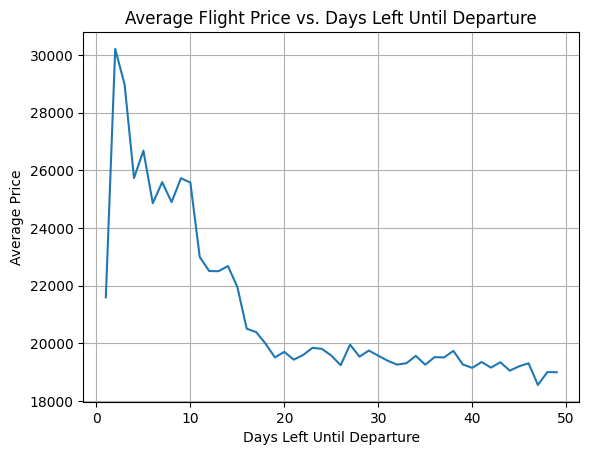

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=price_by_days_left.index,y=price_by_days_left.values)
plt.title('Average Flight Price vs. Days Left Until Departure')
plt.xlabel('Days Left Until Departure')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

## (a)

- **Price Variation:** Flight prices generally tend to be higher when booking very close to the departure date (1–3 days before). As days left until departure increases, the average price tends to decrease and stabilize within a range.
- **Exponential Price Surges:** Prices start to surge around the number of days before departure indicated in the output. This is likely due to increased demand as the date approaches and airlines adjusting prices based on availability and last-minute bookings.
- **Best Booking Window:** The recommended booking window, as indicated by the analysis, is the range of days before the price surge begins. Booking within this window is likely to result in lower average prices. The lowest prices are found further away from the departure date.

In [35]:
# Filter data for Delhi to Mumbai route
delhi_mumbai_flights = df[(df['source_city'] == 'Delhi') & (df['destination_city'] == 'Mumbai')].copy()

# Compare prices across airlines for Delhi-Mumbai route
airline_prices_delhi_mumbai = delhi_mumbai_flights.groupby('airline')['price'].mean().sort_values()

print("Average Flight Prices for Delhi-Mumbai Route by Airline:")
display(airline_prices_delhi_mumbai)
     

Average Flight Prices for Delhi-Mumbai Route by Airline:


airline
AirAsia       3981.191456
Indigo        4473.739130
SpiceJet      4628.251984
GO_FIRST      5762.211515
Air_India    23695.916916
Vistara      26630.293322
Name: price, dtype: float64

##  (b)

Based on the average flight prices for the Delhi-Mumbai route, there are clear pricing differences among airlines:

- **Consistently Cheaper Airlines:** AirAsia, Indigo, and SpiceJet have lower average prices compared to others.
- **Consistently Premium Airlines:** Air India and Vistara have considerably higher average prices, indicating a premium positioning.

**Possible Reasons:**
- **Business Model:** AirAsia, Indigo, and SpiceJet are typically low-cost carriers focused on minimizing operational costs, offering fewer complimentary services, and running point-to-point networks.
- **Service and Amenities:** Premium airlines like Air India and Vistara offer higher service (more spacious seating, complimentary meals/beverages, entertainment, and customer service).
- **Target Audience:** Low-cost carriers target budget-conscious travelers, premium ones target those valuing comfort/convenience.
- **Fleet and Operations:** Type/age/efficiency of aircraft and fleet impact pricing. Newer, more fuel-efficient aircraft can reduce costs for lower fares.
- **Route Network and Frequency:** Extensive networks and higher frequency on popular routes allow flexibility in pricing and competitive fares.

## Question 10
HR Analytics Dataset: a). What factors most strongly correlate with employee attrition? Use visualizations to show key drivers (e.g., satisfaction, overtime, salary). b). Are employees with more projects more likely to leave?

**Answer:**


In [36]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv('hr_analytics.csv')
df


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [38]:


# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display the correlation of 'left' with other features
print("Correlation with Employee Attrition ('left'):")
display(correlation_matrix['left'].sort_values(ascending=False))

Correlation with Employee Attrition ('left'):


left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64

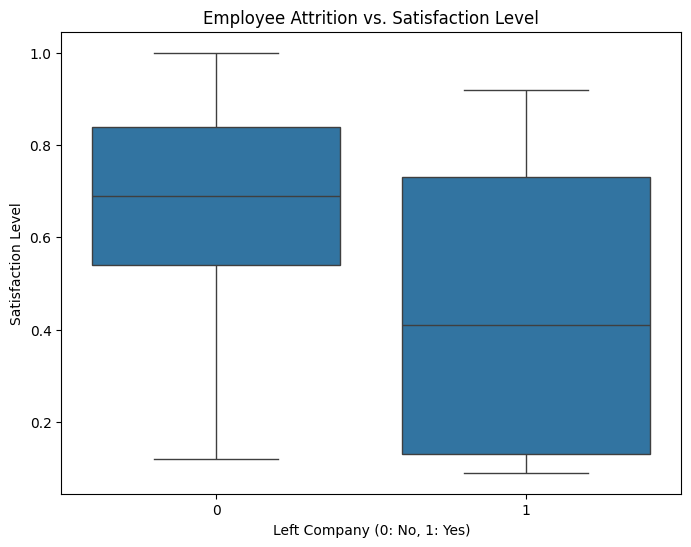

In [39]:

# Visualize the relationship between satisfaction level and attrition
plt.figure(figsize=(8, 6))
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title('Employee Attrition vs. Satisfaction Level')
plt.xlabel('Left Company (0: No, 1: Yes)')
plt.ylabel('Satisfaction Level')
plt.show()

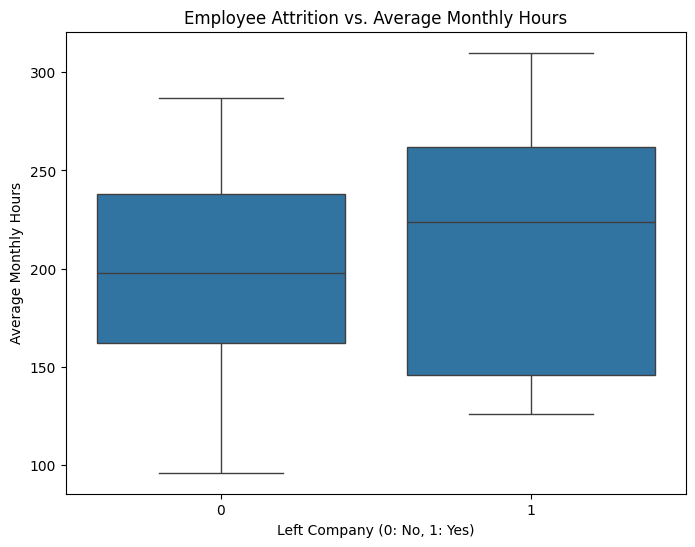

In [40]:


# Visualize the relationship between average monthly hours and attrition
plt.figure(figsize=(8, 6))
sns.boxplot(x='left', y='average_montly_hours', data=df)
plt.title('Employee Attrition vs. Average Monthly Hours')
plt.xlabel('Left Company (0: No, 1: Yes)')
plt.ylabel('Average Monthly Hours')
plt.show()

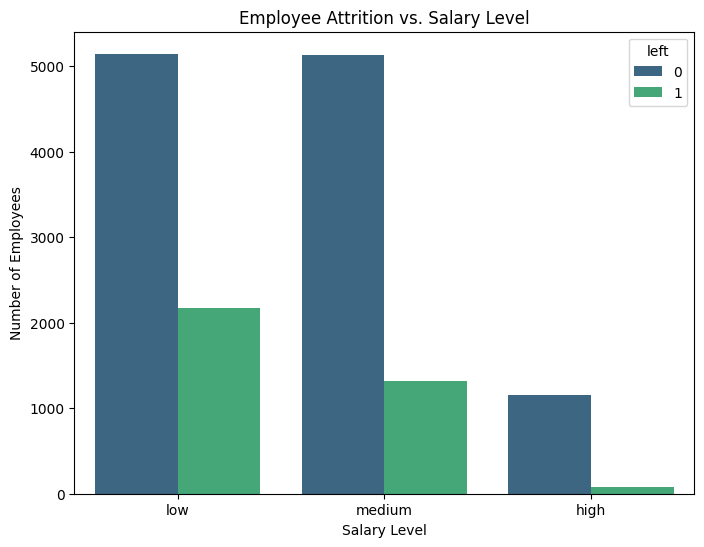

In [41]:

# Visualize the relationship between salary and attrition
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', hue='left', data=df, palette='viridis')
plt.title('Employee Attrition vs. Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.show()

In [42]:


# Group by number of projects and calculate the mean attrition rate
attrition_by_projects = df.groupby('number_project')['left'].mean()

print("Attrition Rate by Number of Projects:")
display(attrition_by_projects)
     

Attrition Rate by Number of Projects:


number_project
2    0.656198
3    0.017756
4    0.093700
5    0.221659
6    0.557922
7    1.000000
Name: left, dtype: float64

C:\Users\shara\AppData\Local\Temp\ipykernel_16052\1078952020.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_by_projects.index, y=attrition_by_projects.values, palette='viridis')


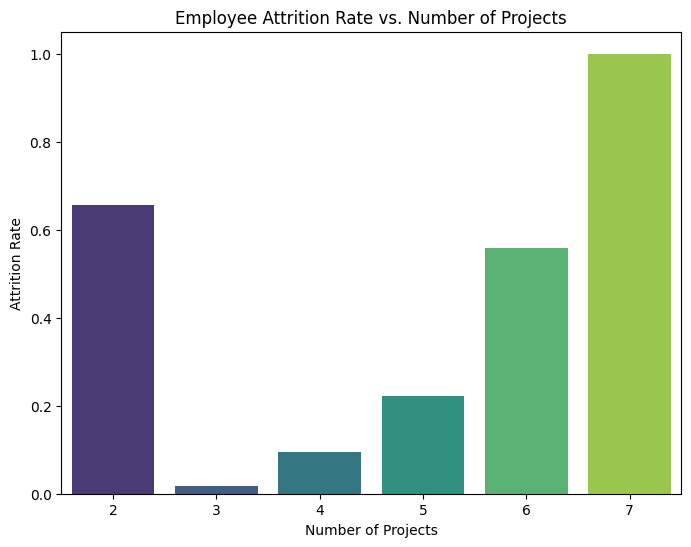

In [43]:
# Visualize the attrition rate by number of projects
plt.figure(figsize=(8, 6))
sns.barplot(x=attrition_by_projects.index, y=attrition_by_projects.values, palette='viridis')
plt.title('Employee Attrition Rate vs. Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Attrition Rate')
plt.show()